# **PCA**







#Step 1 : import libraries

In [1]:
import pandas as pd
import numpy as np

# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
import seaborn as sns

#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [2]:
wine = load_wine(as_frame=True)
df= wine.frame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
print('Original Dataframe shape :',df.shape)

Original Dataframe shape : (178, 14)


In [4]:
X = df[wine['feature_names']]
print('Inputs Dataframe shape   :', X.shape)

Inputs Dataframe shape   : (178, 13)


In [5]:
y=df.target
print('Inputs Dataframe shape   :', y.shape)

Inputs Dataframe shape   : (178,)


#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [7]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

In [9]:
# pipe = make_pipeline(
#     StandardScaler()
#     PCA(n_components=2)
    
# )

#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




#Step 6: Fitting Logistic Regression To the training set




In [10]:
lg_model=LogisticRegression(random_state=0)
lg_model.fit(X_train_pca, y_train)

LogisticRegression(random_state=0)

#Step 7: Predicting the test set result




In [11]:
y_pred=lg_model.predict(X_test_pca)

#Step 8: Making the confusion matrix




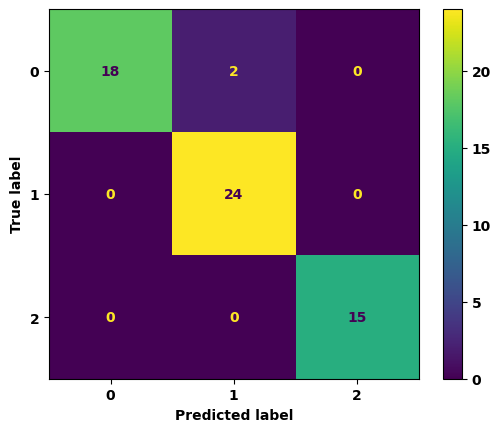

In [12]:
confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred, labels=lg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lg_model.classes_)
disp.plot()
plt.show()

#Step 9: Predicting the training set result




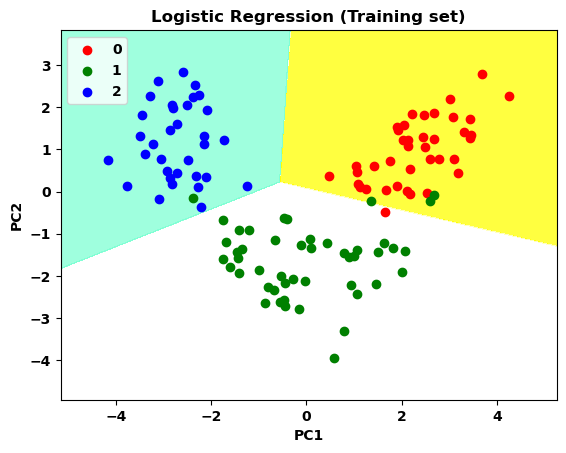

In [14]:
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, lg_model.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()

#Step 10: Visualizing the Test set results




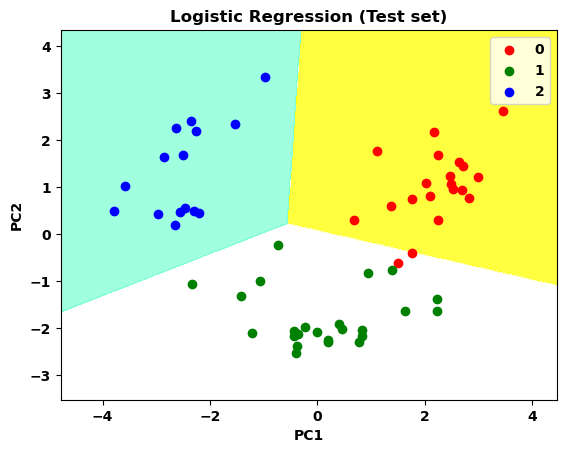

In [15]:
X_set, y_set = X_test_pca, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, lg_model.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()

#**Well Done :)**
Now let's practice!